In [24]:
import pandas as pd

df = pd.read_csv('2d-synthetic.csv')
print(df.head())

         x0        x1  label
0  9.833469  0.319565      0
1  1.801045  8.705072      0
2  4.423918  3.488906      1
3  0.280730  2.689037      1
4  5.999494  9.167512      0


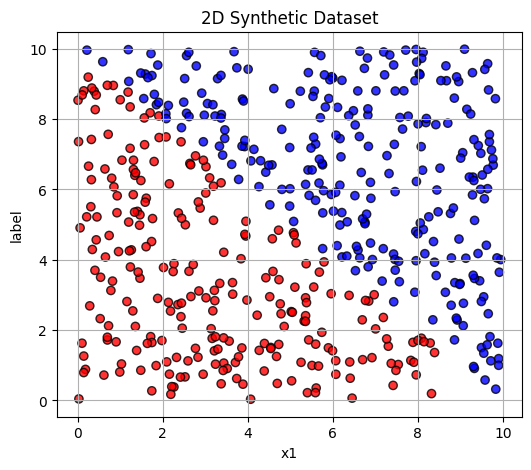

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(df['x0'], df['x1'], c=df['label'], cmap='bwr', alpha=0.8, edgecolor='k')

plt.title("2D Synthetic Dataset")
plt.xlabel("x1")
plt.ylabel("label")
plt.grid(True)
plt.show()


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#print(X, y)


X_train, X_test, y_train, y_test = train_test_split(X,y)
#print(X_train.head())
#print(y_train.head())

clf = DecisionTreeClassifier(max_depth=5, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print(acc)



0.92


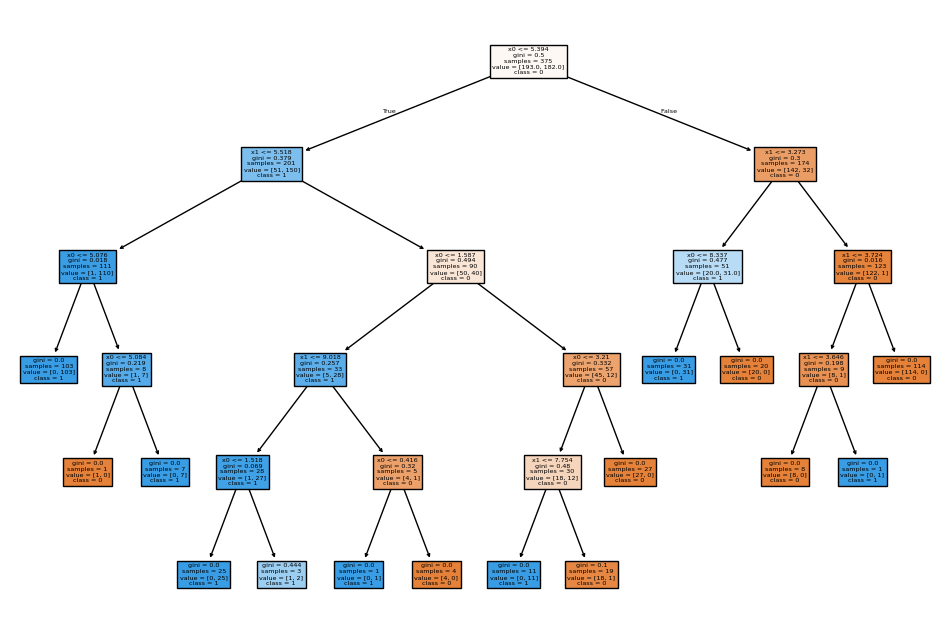

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['x0', 'x1'], class_names=['0', '1'])
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


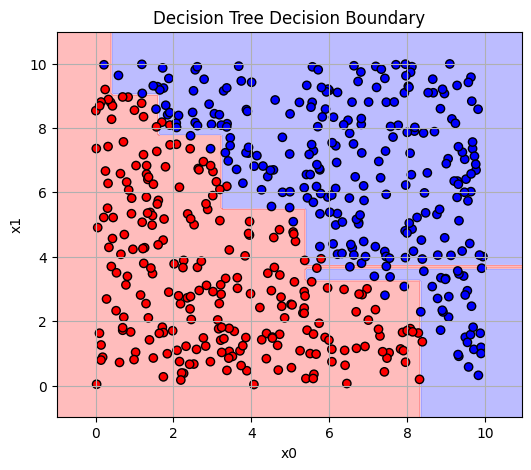

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid
x_min, x_max = df['x0'].min() - 1, df['x0'].max() + 1
y_min, y_max = df['x1'].min() - 1, df['x1'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(df['x0'], df['x1'], c=df['label'], cmap='bwr', edgecolor='k')
plt.title("Decision Tree Decision Boundary")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

df['r'] = np.sqrt(df['x0']**2 + df['x1']**2)
df['theta'] = np.arctan2(df['x1'], df['x0'])
df['sum'] = df['x0'] + df['x1']



X_new = df[['x0', 'x1', 'sum']]
y_new = df['label']

print(X_new, y_new)



           x0        x1        sum
0    9.833469  0.319565  10.153034
1    1.801045  8.705072  10.506117
2    4.423918  3.488906   7.912825
3    0.280730  2.689037   2.969767
4    5.999494  9.167512  15.167006
..        ...       ...        ...
495  4.995458  8.437083  13.432541
496  6.636632  9.931535  16.568168
497  6.373259  8.098388  14.471647
498  1.230331  7.169844   8.400175
499  6.070298  0.741824   6.812123

[500 rows x 3 columns] 0      0
1      0
2      1
3      1
4      0
      ..
495    0
496    0
497    0
498    1
499    1
Name: label, Length: 500, dtype: int64


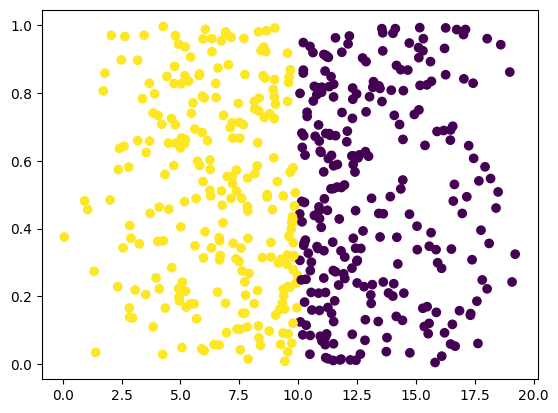

In [47]:
plt.scatter(df['sum'], np.random.random(500), c=y)


In [30]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new)
#print(X_train.head())
#print(y_train.head())

clf_new = DecisionTreeClassifier(max_depth=5, random_state=42)

clf_new.fit(X_train_new, y_train_new)

y_pred_new = clf_new.predict(X_test_new)

acc_new = accuracy_score(y_pred_new, y_test_new)

print(acc_new)

1.0


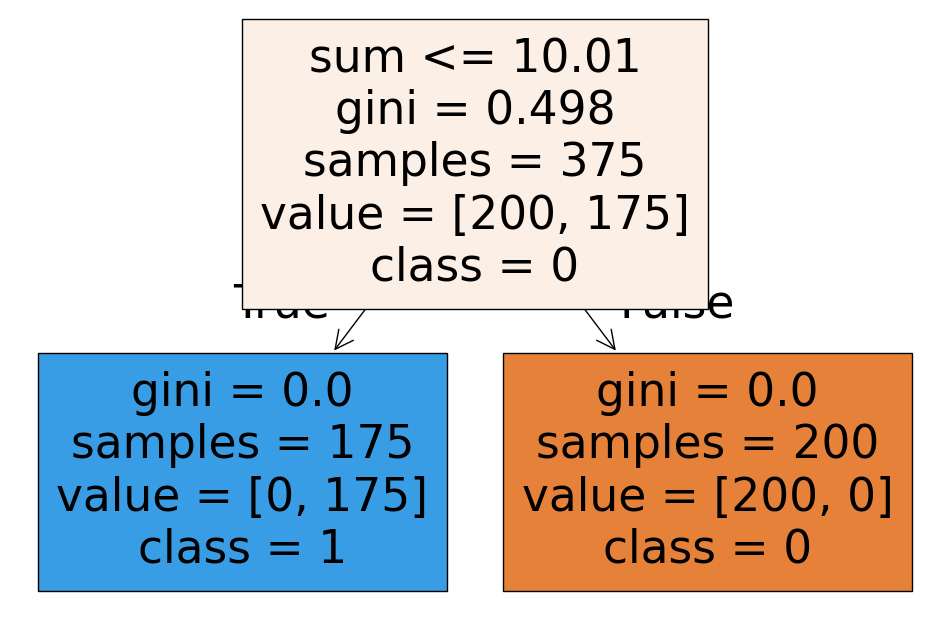

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf_new, filled=True, feature_names=['x0', 'x1', 'sum'], class_names=['0', '1'])
plt.show()

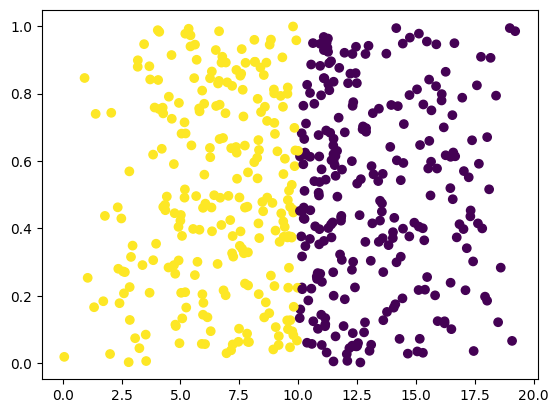